# Demonstration of `open_spiel` Implementation of Mathematico

This notebook is a demonstration of using Mathematico in `open_spiel`.

In [1]:
import sys
sys.path.append("../")

import pyspiel
from open_spiel.python.algorithms import mcts
import numpy as np
from tqdm.notebook import tqdm, trange
from matplotlib import pyplot as plt

## Loading Game

To load the game using `pyspiel`, import the package which will register the game:

In [2]:
import src.agents.ospiel  # this registers the game, do not remove
game = pyspiel.load_game("mathematico")

## Playing Random Game

In [3]:
state = game.new_initial_state()

RANDOM_PLAYER = lambda state: np.random.choice(state.legal_actions())
while not state.is_terminal():
    action = RANDOM_PLAYER(state)
    state.apply_action(action)

print("Final state")
print(state)
print("Score =", state.returns()[0])

Final state
+--+--+--+--+--+
|10| 2|13| 8|12|
+--+--+--+--+--+
| 9| 7|13| 9|10|
+--+--+--+--+--+
| 2| 2| 9| 4|13|
+--+--+--+--+--+
| 2| 3|11|10| 8|
+--+--+--+--+--+
|11| 9| 4|11|13|
+--+--+--+--+--+
Card: None
Deck: {1: 4, 2: 0, 3: 3, 4: 2, 5: 4, 6: 4, 7: 3, 8: 2, 9: 0, 10: 1, 11: 1, 12: 3, 13: 0}
Score = 110


## MCTS Player

In [3]:
state = game.new_initial_state()
evaluator = mcts.RandomRolloutEvaluator()
bot = mcts.MCTSBot(game, uct_c=1.4, max_simulations=50, evaluator=evaluator)

while not state.is_terminal():
    if state.is_chance_node():
        action = RANDOM_PLAYER(state)
    else:
        action = bot.step(state)
    state.apply_action(action)

print(state)
print(state.returns()[0])

+--+--+--+--+--+
| 9|13| 9| 5|13|
+--+--+--+--+--+
| 6| 4| 4|11| 4|
+--+--+--+--+--+
| 7| 7|10| 3| 3|
+--+--+--+--+--+
| 6| 1|11|10| 2|
+--+--+--+--+--+
|12|12|12|12| 2|
+--+--+--+--+--+
Card: None
Deck: {1: 3, 2: 2, 3: 2, 4: 1, 5: 3, 6: 2, 7: 2, 8: 4, 9: 2, 10: 2, 11: 2, 12: 0, 13: 2}
440


## Exploration vs \#Simulations

In this last part, we explore different settings for MCTS players and find
the maximising ones, which will then be used in the impemented class.
Specifically, we are interested in the relation between _exploration constant_
and _number of MCTS rollouts_.

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

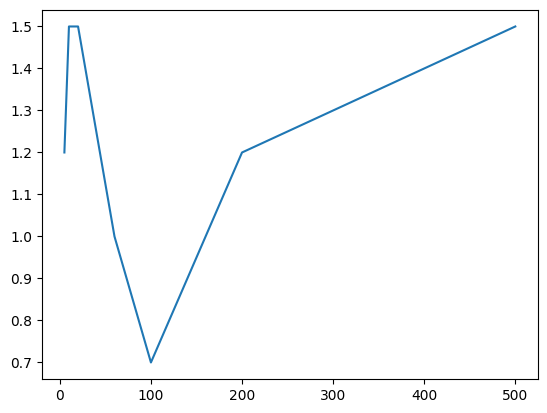

In [4]:
best_uct_c = {}  # num_simuls -> float
SIMULS = [5, 10, 20, 60, 100, 200, 500]
UCT_C = [0.2, 0.5, 0.7, 1., 1.2, 1.5]
GAMES = 10

for s in tqdm(SIMULS):
    uct_to_avg_score = {}
    for uct in tqdm(UCT_C, leave=None):
        scores = []
        bot = mcts.MCTSBot(game, uct_c=uct, max_simulations=s, evaluator=mcts.RandomRolloutEvaluator())
        for _ in trange(GAMES, leave=None):
            state = game.new_initial_state()
            while not state.is_terminal():
                if state.is_chance_node():
                    action = RANDOM_PLAYER(state)
                else:
                    action = bot.step(state)
                state.apply_action(action)
            scores.append(state.returns()[0])
        uct_to_avg_score[uct] = sum(scores) / len(scores)
    best_uct_c[s] = max(uct_to_avg_score, key=lambda uct: uct_to_avg_score[uct])

x, y = zip(*sorted(best_uct_c.items())) 
plt.plot(x, y); # x-num simuls, y-best uct_c

Based on these data, we will (for each number of simulations, for pure MCTS player) pick the corresponding `uct_c` value.

In [8]:
list(best_uct_c.items())

[(5, 1.2), (10, 1.5), (20, 1.5), (60, 1.0), (100, 0.7), (200, 1.2), (500, 1.5)]

```[(5, 1.2), (10, 1.5), (20, 1.5), (60, 1.0), (100, 0.7), (200, 1.2), (500, 1.5)]```